In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages
library(ggplot2)
library(dplyr)
library(gridExtra)
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     


── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors



Attaching package: ‘gridExtra’




The following object is masked from ‘package:dplyr’:

    combine




In [2]:
dailyActivity_merged1 <- read.csv("../input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/dailyActivity_merged.csv")
dailyActivity_merged2 <- read.csv("../input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
dailySleep_merged1 <- read.csv("../input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")

In [3]:
dailyActivity_merged1_cleaned <- distinct(dailyActivity_merged1)
dailyActivity_merged2_cleaned <- distinct(dailyActivity_merged2)
dailySleep_merged <- distinct(dailySleep_merged1)

In [4]:
dailyActivity_merged <- rbind(dailyActivity_merged1_cleaned, dailyActivity_merged2_cleaned)

In [5]:
summary(dailyActivity_merged)
str(dailyActivity_merged)

       Id            ActivityDate         TotalSteps    TotalDistance   
 Min.   :1.504e+09   Length:1397        Min.   :    0   Min.   : 0.000  
 1st Qu.:2.320e+09   Class :character   1st Qu.: 3146   1st Qu.: 2.170  
 Median :4.445e+09   Mode  :character   Median : 6999   Median : 4.950  
 Mean   :4.781e+09                      Mean   : 7281   Mean   : 5.219  
 3rd Qu.:6.962e+09                      3rd Qu.:10544   3rd Qu.: 7.500  
 Max.   :8.878e+09                      Max.   :36019   Max.   :28.030  
 TrackerDistance  LoggedActivitiesDistance VeryActiveDistance
 Min.   : 0.000   Min.   :0.0000           Min.   : 0.000    
 1st Qu.: 2.160   1st Qu.:0.0000           1st Qu.: 0.000    
 Median : 4.950   Median :0.0000           Median : 0.100    
 Mean   : 5.192   Mean   :0.1315           Mean   : 1.397    
 3rd Qu.: 7.480   3rd Qu.:0.0000           3rd Qu.: 1.830    
 Max.   :28.030   Max.   :6.7271           Max.   :21.920    
 ModeratelyActiveDistance LightActiveDistance Sedentary

'data.frame':	1397 obs. of  15 variables:
 $ Id                      : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDate            : chr  "3/25/2016" "3/26/2016" "3/27/2016" "3/28/2016" ...
 $ TotalSteps              : int  11004 17609 12736 13231 12041 10970 12256 12262 11248 10016 ...
 $ TotalDistance           : num  7.11 11.55 8.53 8.93 7.85 ...
 $ TrackerDistance         : num  7.11 11.55 8.53 8.93 7.85 ...
 $ LoggedActivitiesDistance: num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveDistance      : num  2.57 6.92 4.66 3.19 2.16 ...
 $ ModeratelyActiveDistance: num  0.46 0.73 0.16 0.79 1.09 ...
 $ LightActiveDistance     : num  4.07 3.91 3.71 4.95 4.61 ...
 $ SedentaryActiveDistance : num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveMinutes       : int  33 89 56 39 28 30 33 47 40 15 ...
 $ FairlyActiveMinutes     : int  12 17 5 20 28 13 12 21 11 30 ...
 $ LightlyActiveMinutes    : int  205 274 268 224 243 223 239 200 244 314 ...
 $ SedentaryMinutes        : int  804 588 605 1080

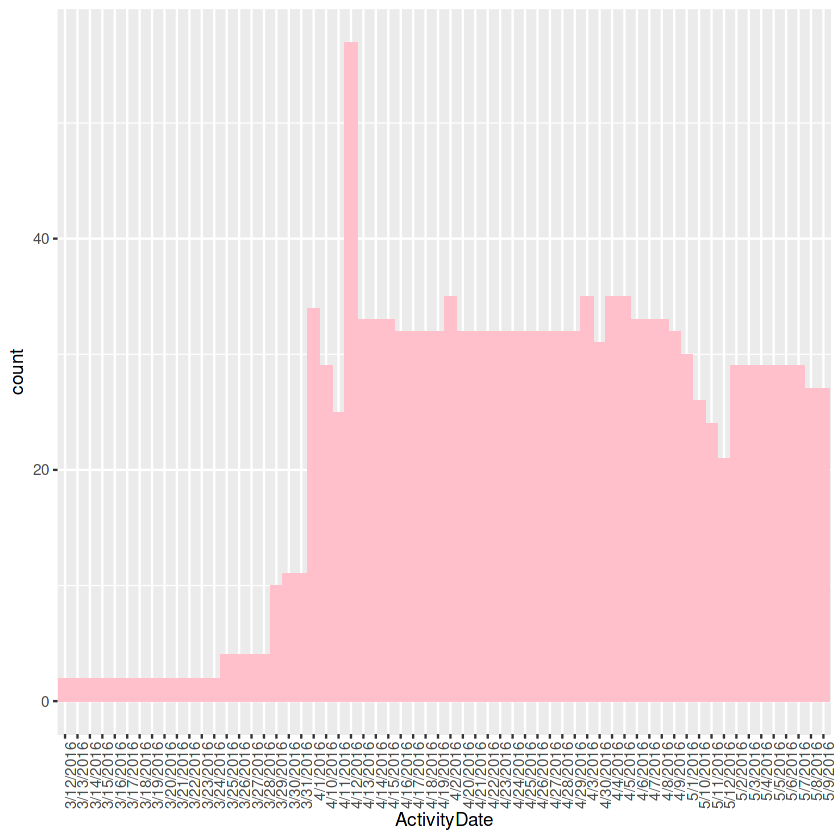

In [6]:
ggplot(dailyActivity_merged, aes(x = ActivityDate)) +
    geom_bar(fill = "pink", width = 1) +
    theme(axis.text.x = element_text(angle = 90, hjust = 1))



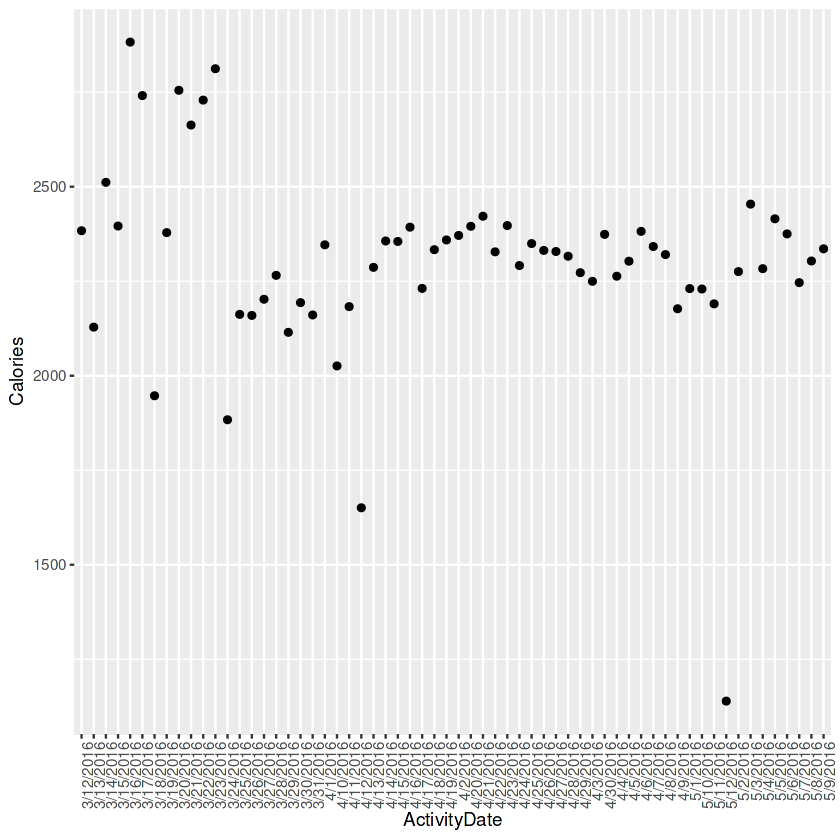

In [7]:
avg_cal <- aggregate(Calories ~ ActivityDate, data = dailyActivity_merged, FUN = mean)

ggplot(avg_cal, aes(x = ActivityDate, y = Calories)) +
    geom_point() +
    theme(axis.text.x = element_text(angle = 90, hjust = 1))
    

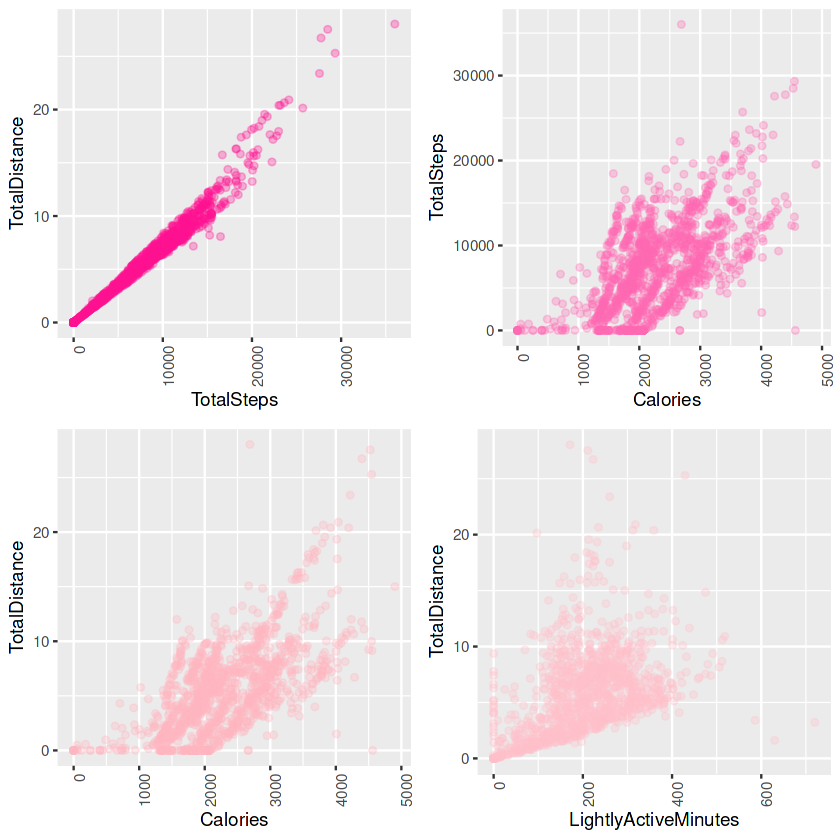

In [8]:
point1 <- ggplot(dailyActivity_merged) +
    geom_point(aes(x = TotalSteps, y = TotalDistance), color = "deeppink", alpha = 0.3) +
    theme(axis.text.x = element_text(angle = 90, hjust = 1))
point2 <- ggplot(dailyActivity_merged) +
    geom_point(aes(x = Calories, y = TotalSteps), color = "hotpink", alpha = 0.3) +
    theme(axis.text.x = element_text(angle = 90, hjust = 1))
point3 <- ggplot(dailyActivity_merged) +
    geom_point(aes(x = Calories, y = TotalDistance), color = "lightpink", alpha = 0.3) +
    theme(axis.text.x = element_text(angle = 90, hjust = 1))
point4 <- ggplot(dailyActivity_merged) +
    geom_point(aes(x = LightlyActiveMinutes, y = TotalDistance), color = "pink", alpha = 0.3) +
    theme(axis.text.x = element_text(angle = 90, hjust = 1))

grid.arrange(point1, point2, point3, point4, ncol = 2)

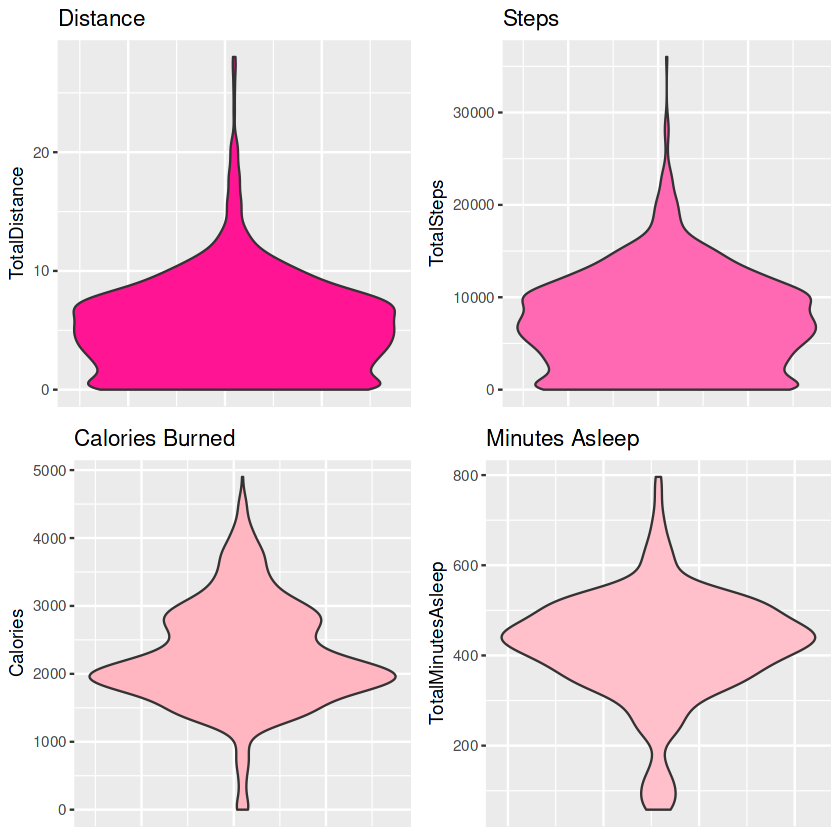

In [9]:
violin1 <- ggplot(dailyActivity_merged, aes(x = Id, y = TotalDistance)) +
    geom_violin(fill = "deeppink") +
    labs(title = "Distance") +
    theme(
        axis.title.x = element_blank(),
        axis.text.x = element_blank(),
        axis.ticks.x = element_blank()
    )
violin2 <- ggplot(dailyActivity_merged, aes(x = Id, y = TotalSteps)) +
    geom_violin(fill = "hotpink") +
    labs(title = "Steps") +
    theme(
        axis.title.x = element_blank(),
        axis.text.x = element_blank(),
        axis.ticks.x = element_blank()
    )

violin3 <- ggplot(dailyActivity_merged, aes(x = Id, y = Calories)) +
    geom_violin(fill = "lightpink") +
    labs(title = "Calories Burned") +
    theme(
        axis.title.x = element_blank(),
        axis.text.x = element_blank(),
        axis.ticks.x = element_blank()
    )
violin4 <- ggplot(dailySleep_merged, aes(x = Id, y = TotalMinutesAsleep)) +
    geom_violin(fill = "pink") +
    labs(title = "Minutes Asleep") +
    theme(
        axis.title.x = element_blank(),
        axis.text.x = element_blank(),
        axis.ticks.x = element_blank()
    )

grid.arrange(violin1, violin2, violin3, violin4, ncol = 2)

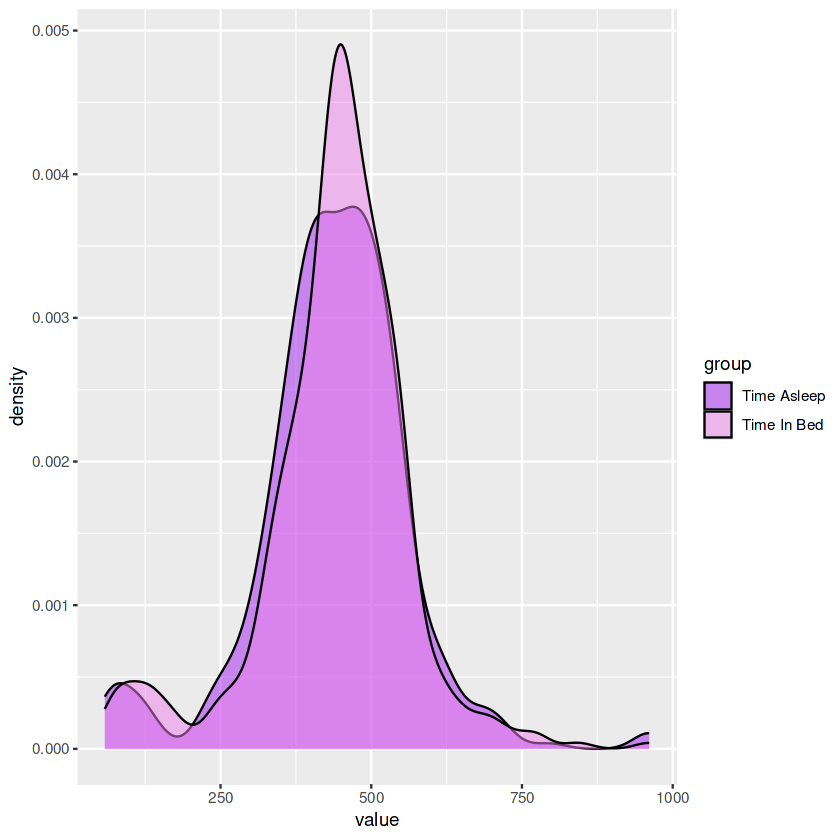

In [10]:
sleep <- data.frame(
    value = c(dailySleep_merged$TotalTimeInBed, dailySleep_merged$TotalMinutesAsleep),
    group = c("Time In Bed", "Time Asleep")
    )

ggplot(sleep, aes(x = value, fill = group)) +
    geom_density(alpha = 0.5) +
    scale_fill_manual(values = c("Time In Bed" = "violet", "Time Asleep" = "purple"))